<a href="https://colab.research.google.com/github/abdularif0705/WinHacks-2022/blob/main/charging_stations_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
roads = gpd.read_file("/content/roads.shp")
natural = gpd.read_file("/content/natural.shp")
landuse = gpd.read_file("/content/landuse.shp")
buildings = gpd.read_file("/content/buildings.shp")
points = gpd.read_file("/content/points.shp")
places = gpd.read_file("/content/places.shp")
water = gpd.read_file("/content/waterways.shp")
railways = gpd.read_file("/content/railways.shp")

## Windsor Geospatial Map

In [4]:
'''
#dataset = ['places','roads','natural','buildings','landuse','water','railways','points']
fig, ax = plt.subplots(figsize = (10, 10))
natural.plot(ax = ax,edgecolor = 'green')
roads.plot(ax = ax,edgecolor = 'grey')
water.plot(ax = ax,edgecolor = 'lightblue')
points.plot(ax = ax,edgecolor = 'black')
landuse.plot(ax = ax,edgecolor = 'green')
railways.plot(ax = ax,edgecolor = 'orange')
buildings.plot(ax = ax,edgecolor = 'yellow')
places.plot(ax = ax,edgecolor = 'red')
ax.set_axis_off()
plt.legend()
plt.show()
'''

"\n#dataset = ['places','roads','natural','buildings','landuse','water','railways','points']\nfig, ax = plt.subplots(figsize = (10, 10))\nnatural.plot(ax = ax,edgecolor = 'green')\nroads.plot(ax = ax,edgecolor = 'grey')\nwater.plot(ax = ax,edgecolor = 'lightblue')\npoints.plot(ax = ax,edgecolor = 'black')\nlanduse.plot(ax = ax,edgecolor = 'green')\nrailways.plot(ax = ax,edgecolor = 'orange')\nbuildings.plot(ax = ax,edgecolor = 'yellow')\nplaces.plot(ax = ax,edgecolor = 'red')\nax.set_axis_off()\nplt.legend()\nplt.show()\n"

## Individual Map File Analysis

### Points

In [5]:
points.sample(5)

,osm_id,timestamp,name,type,geometry
1520,1798730529,None,None,level_crossing,POINT (-82.84711 42.30845)
2303,-2134559343,None,Kingdom Hall of Jehovah's Witnesses,place_of_worship,POINT (-83.10958 42.08827)
3463,1830027991,None,Subway,fast_food,POINT (-82.87176 42.27945)
3423,1731086140,None,None,stop,POINT (-82.73075 42.17461)
3684,1875799726,None,None,crossing,POINT (-82.91548 42.03550)


In [6]:
points.shape

(5907, 5)

In [7]:
points['type'].value_counts()

crossing            1387
storage_tank         658
turning_circle       657
traffic_signals      424
street_lamp          377
                    ... 
charging_station       1
windmill               1
clock                  1
arts_centre            1
vending_machine        1
Name: type, Length: 111, dtype: int64

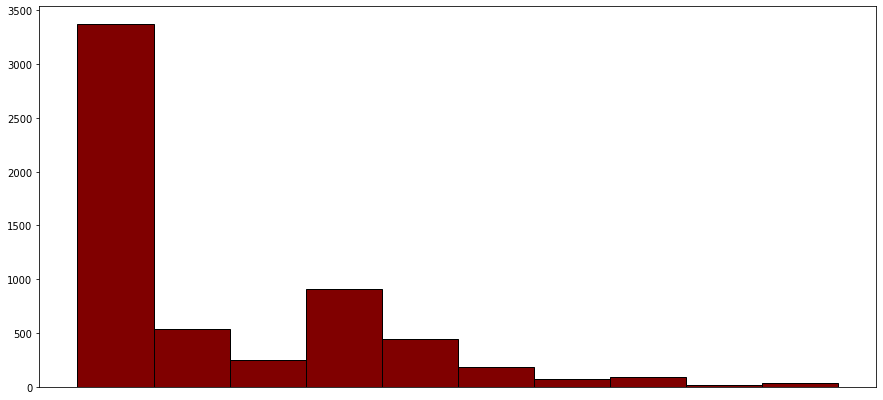

In [8]:
plt.figure(figsize =(15, 7))
plt.hist(points['type'],color = "maroon", ec="black")
plt.xticks([],[])
plt.show()

In [9]:
data = ['traffic_signals', 'turning_circle', 'crossing', 'level_crossing', 'turning_loop',
       'railway_crossing', 'stop', 'switch', 'gallery','parking', 'information',
       'place_of_worship', 'buffer_stop','lighthouse',
       'mini_roundabout', 'yes', 'passing_place',
       'fire_station', 'townhall', 'museum', 'post_box', 'ferry_terminal',
       'pharmacy', 'restaurant', 'flagpole', 'cafe', 'tower', 'fast_food', 'toilets', 'vending_machine', 'shelter',
       'grave_yard', 'storage_tank', 'water_tower',
       'post_office', 'picnic_site', 'petroleum_well', 'chimney',
       'attraction', 'community_centre', 'coast_guard', 'street_lamp',
       'drinking_water', 'bar', 'doctors', 'theatre',
       'bank', 'artwork', 'mast', 'clinic', 'telephone', 'waste_basket',
       'marketplace', 'bench', 'ice_cream', 'events_venue', 'veterinary',
       'nightclub', 'social_facility','monument', 'memorial', 'fountain', 'library', 'locomotive',
       'surveillance', 'street_cabinet', 'vacuum_cleaner', 
       'dentist', 'windmill','wastewater_plant', 'parking_entrance',
       'arts_centre', 'clock', 'pub', 'junction', 'give_way', 'vacant',
       'pumping_rig', 'boundary_stone', 'bureau_de_change', 'food_court',
       'dojo', 'prep_school', 'raceway', 'silo', 'kindergarten',
       'music_school', 'tank', 'disused:bar', 'manhole', 'atm',
       'social_centre', 'recycling', 'works']


# Dropping locations from data where installing Charging station is not feasible

for location in data:
  points.drop(points.loc[points['type'] == location ].index, inplace=True)

In [10]:
#Dropping useless columns
points =  points.drop(['timestamp','name'],axis=1)

In [11]:
points.head()

,osm_id,type,geometry
3,18354426,motorway_junctio,POINT (-82.55877 42.24257)
7,31920568,motorway_junctio,POINT (-82.95765 42.24757)
14,62579556,motorway_junctio,POINT (-83.11480 42.30335)
17,62596048,motorway_junctio,POINT (-83.09826 42.31087)
83,62690186,milestone,POINT (-83.14879 42.24251)


### Buildings

In [12]:
buildings.sample(5)

,osm_id,name,type,geometry
35859,783461812,None,None,"POLYGON ((-82.97681 42.25196, -82.97677 42.251..."
23715,782199027,None,None,"POLYGON ((-82.91201 42.30698, -82.91217 42.306..."
27278,782852708,None,None,"POLYGON ((-82.94310 42.29226, -82.94317 42.292..."
86829,1003286420,None,commercial,"POLYGON ((-82.60038 42.03844, -82.60058 42.038..."
41782,783471728,None,None,"POLYGON ((-82.97496 42.31962, -82.97506 42.319..."


In [13]:
buildings.shape

(87791, 4)

In [14]:
buildings['type'].value_counts()

house              17180
garage              3316
commercial           278
industrial           265
retail               222
                   ...  
oil_tank               1
interlocking           1
public_building        1
coast_guard            1
works                  1
Name: type, Length: 88, dtype: int64

In [15]:
buildings['type'].unique()

array(['retail', None, 'public_building', 'bus_station', 'university',
       'parking', 'community_centre', 'wastewater_plant',
       'social_facility', 'fort', 'warehouse', 'industrial', 'school',
       'place_of_worship', 'commercial', 'roof', 'house', 'museum',
       'stable', 'church', 'hospital', 'library', 'motel', 'fast_food',
       'restaurant', 'apartments', 'vacant', 'terrace', 'bar', 'toilets',
       'police', 'townhall', 'hotel', 'greenhouse', 'doctors', 'bank',
       'service', 'civic', 'garage', 'clinic', 'coast_guard',
       'farm_auxiliary', 'hangar', 'fire_station', 'cinema', 'dormitory',
       'office', 'cafe', 'public', 'pharmacy', 'residential',
       'veterinary', 'social_centre', 'interlocking', 'oil_tank', 'shed',
       'gasometer', 'storage_tank', 'dentist', 'disused:yes', 'ice_cream',
       'pumping_station', 'hut', 'radio_studio', 'casino', 'nightclub',
       'silo', 'car_wash', 'gambling', 'post_office', 'pub', 'ruins',
       'fuel', 'tower', 'b

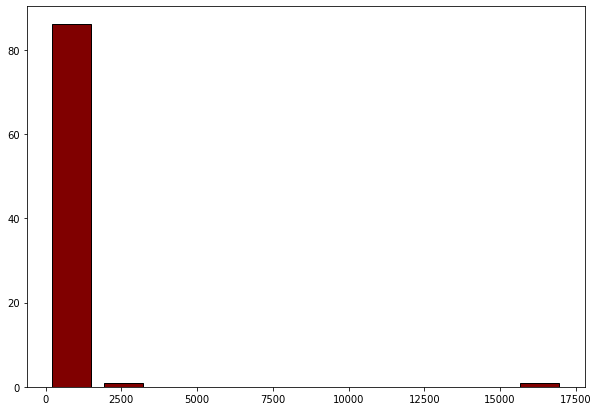

In [16]:
plt.figure(figsize =(10, 7))
plt.hist(buildings['type'].value_counts(),color = "maroon", ec="black",rwidth=0.75)
plt.show()

In [17]:
data = ['None', 'public_building', 'community_centre', 'wastewater_plant',
       'social_facility', 'fort', 'warehouse', 'place_of_worship', 
       'commercial', 'roof', 'house', 'museum',
       'stable', 'church', 'library', 'fast_food',
       'restaurant', 'apartments', 'vacant', 'terrace', 'bar', 'toilets',
       'police', 'townhall', 'greenhouse', 'doctors', 'bank',
       'service', 'civic', 'clinic', 'coast_guard', 'farm_auxiliary', 
       'hangar', 'fire_station', 'cinema', 'dormitory', 'cafe', 'pharmacy',
       'veterinary', 'interlocking', 'oil_tank', 'shed',
       'gasometer', 'storage_tank', 'dentist', 'disused:yes', 'ice_cream', 'hut',
       'radio_studio', 'casino', 'nightclub', 'silo', 'gambling',
        'post_office', 'pub', 'ruins', 'tower', 'chapel', 'detached', 
       'shelter', 'childcare', 'manse', 'barn', 'quonset','proposed',
       'events_venue', 'construction', 'pavilion']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  buildings.drop(buildings.loc[buildings['type'] == location ].index, inplace=True)

In [18]:
buildings.drop(buildings.loc[buildings['type'] == None ].index, inplace=True)

In [19]:
#Dropping useless columns
buildings =  buildings.drop(['name'],axis=1)

In [20]:
buildings.head()

,osm_id,type,geometry
0,23348166,retail,"POLYGON ((-82.93770 42.31559, -82.93753 42.315..."
1,23348398,None,"POLYGON ((-82.93841 42.31250, -82.93825 42.312..."
2,23348456,retail,"POLYGON ((-82.94159 42.31351, -82.94135 42.313..."
4,23375623,retail,"POLYGON ((-82.92992 42.31544, -82.92992 42.315..."
5,23388679,bus_station,"POLYGON ((-83.04335 42.31790, -83.04315 42.317..."


### Landuse

In [21]:
landuse.sample(5)

,osm_id,name,type,geometry
2638,798539791,None,religious,"POLYGON ((-83.09762 42.23607, -83.09788 42.235..."
3157,993780147,None,commercial,"POLYGON ((-82.74380 42.12821, -82.74406 42.128..."
1942,751180658,None,retail,"POLYGON ((-83.02487 42.28979, -83.02624 42.289..."
1972,751393287,Former Queen of Peace Catholic School,brownfield,"POLYGON ((-82.61289 42.03842, -82.61272 42.040..."
3316,1037269912,None,farmland,"POLYGON ((-82.74604 42.13476, -82.74358 42.136..."


In [22]:
landuse.shape

(3342, 4)

In [23]:
landuse['type'].value_counts()

residential         1179
industrial           548
retail               499
grass                465
commercial           174
farmland             119
religious            106
brownfield            67
cemetery              61
reservoir             28
meadow                25
quarry                13
construction          12
landfill               9
basin                  8
farmyard               7
recreation_groun       6
allotments             4
railway                3
military               3
orchard                2
vineyard               1
civic_admin            1
plant_nursery          1
greenhouse_horti       1
Name: type, dtype: int64

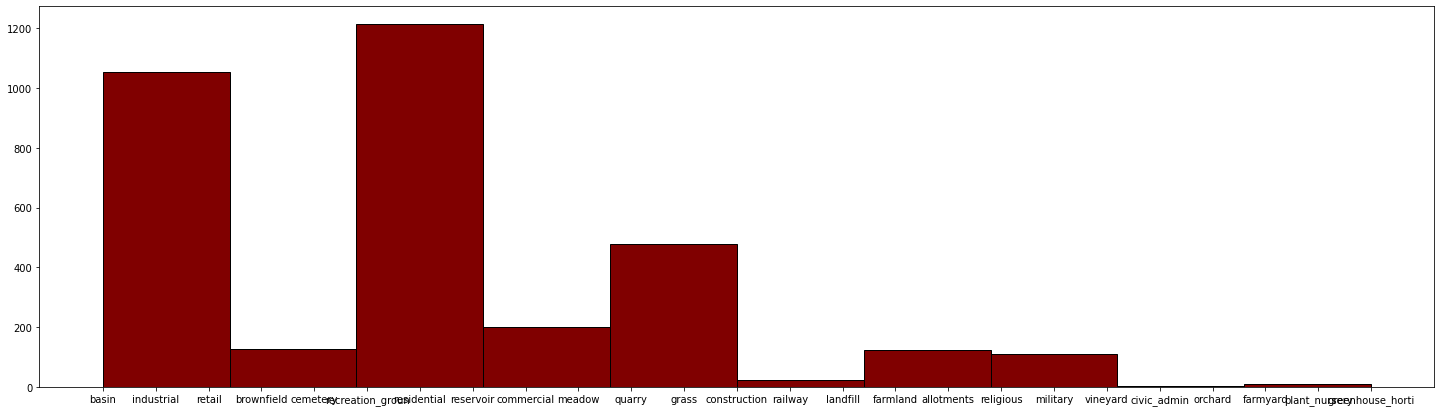

In [24]:
plt.figure(figsize =(25, 7))
plt.hist(landuse['type'],color = "maroon", ec="black")
plt.show()

In [25]:
landuse['type'].unique()

array(['basin', 'industrial', 'retail', 'brownfield', 'cemetery',
       'recreation_groun', 'residential', 'reservoir', 'commercial',
       'meadow', 'quarry', 'grass', 'construction', 'railway', 'landfill',
       'farmland', 'allotments', 'religious', 'military', 'vineyard',
       'civic_admin', 'orchard', 'farmyard', 'plant_nursery',
       'greenhouse_horti'], dtype=object)

In [26]:
data = ['basin', 'industrial', 'brownfield', 'cemetery',
       'recreation_groun', 'reservoir',
       'meadow', 'quarry', 'grass', 'construction', 'landfill',
       'farmland', 'allotments', 'religious', 'military', 'vineyard',
       'civic_admin', 'orchard', 'farmyard', 'plant_nursery',
       'greenhouse_horti']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  landuse.drop(landuse.loc[landuse['type'] == location ].index, inplace=True)

In [27]:
#Dropping useless columns
landuse =  landuse.drop(['name'],axis=1)

In [28]:
landuse.head()

,osm_id,type,geometry
3,23375580,retail,"POLYGON ((-83.02855 42.26674, -83.02798 42.265..."
4,23375626,retail,"POLYGON ((-82.92957 42.31667, -82.92903 42.314..."
5,23375632,retail,"POLYGON ((-82.93794 42.31317, -82.93224 42.314..."
6,23375640,retail,"POLYGON ((-82.94223 42.31734, -82.94086 42.315..."
7,23375653,retail,"POLYGON ((-82.94514 42.31525, -82.94202 42.315..."


### Water

In [29]:
water.sample(5)

,osm_id,name,type,width,geometry
353,204614284,None,stream,NaN,"LINESTRING (-82.96598 42.00576, -82.96606 42.0..."
3233,206176859,None,stream,NaN,"LINESTRING (-83.03707 42.04454, -83.03724 42.0..."
1197,205003350,None,stream,NaN,"LINESTRING (-82.99898 42.20341, -82.99908 42.2..."
3263,206176959,None,stream,NaN,"LINESTRING (-83.08376 42.05694, -83.08188 42.0..."
620,204757566,None,stream,NaN,"LINESTRING (-82.82635 42.09158, -82.82636 42.0..."


In [30]:
water.shape

(4007, 5)

In [31]:
water['type'].value_counts()

stream    3777
drain      160
ditch       38
river       24
dock         5
dam          2
canal        1
Name: type, dtype: int64

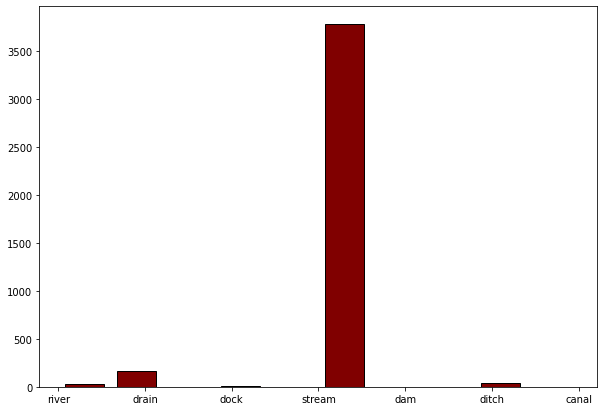

In [32]:
plt.figure(figsize =(10, 7))
plt.hist(water['type'],color = "maroon", ec="black",rwidth=0.75)
plt.show()

In [33]:
water['type'].unique()

array(['river', 'drain', 'dock', 'stream', 'dam', 'ditch', 'canal'],
      dtype=object)

In [34]:
data = ['river', 'drain','stream', 'dam', 'ditch', 'canal']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  water.drop(water.loc[water['type'] == location ].index, inplace=True)

In [35]:
#Dropping useless columns
water =  water.drop(['name','width'],axis=1)

In [36]:
water.head()

,osm_id,type,geometry
2,4894669,dock,"LINESTRING (-83.10137 42.27106, -83.10033 42.2..."
3867,560092401,dock,"LINESTRING (-83.12502 42.25973, -83.12485 42.2..."
3868,560092402,dock,"LINESTRING (-83.12444 42.25944, -83.12432 42.2..."
3900,641696037,dock,"LINESTRING (-82.70888 42.29813, -82.70891 42.2..."
3939,791845924,dock,"LINESTRING (-82.46652 42.30798, -82.46652 42.3..."


### Railways

In [37]:
railways.sample(5)

,osm_id,name,type,geometry
1163,555498226,NS Livernois Intermodal Yard,yard,"LINESTRING (-83.11167 42.31887, -83.11253 42.3..."
1008,189283774,None,rail,"LINESTRING (-83.12892 42.25324, -83.12895 42.2..."
429,161721912,Canadian Pacific Railway - Windsor Subdivision,rail,"LINESTRING (-82.94563 42.28948, -82.94312 42.2..."
68,8756468,Conrail - Detroit Shared Assets Area,rail,"LINESTRING (-83.14858 42.30043, -83.14858 42.3..."
721,165265176,None,rail,"LINESTRING (-83.12118 42.28106, -83.12106 42.2..."


In [38]:
railways.shape

(1221, 4)

In [39]:
railways['type'].value_counts()

rail         1076
abandoned      86
disused        50
yard            7
turntable       1
razed           1
Name: type, dtype: int64

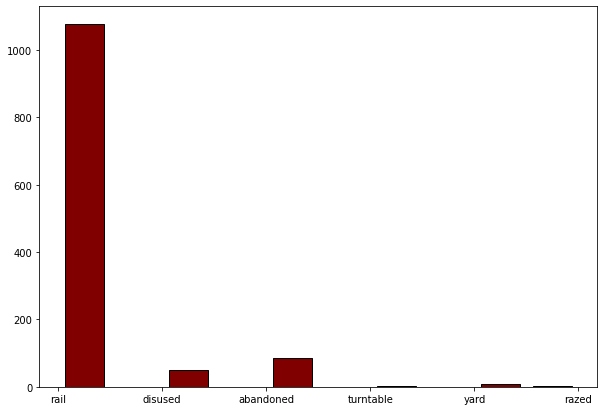

In [40]:
plt.figure(figsize =(10, 7))
plt.hist(railways['type'],color = "maroon", ec="black",rwidth=0.75)
plt.show()

In [41]:
railways['type'].unique()

array(['rail', 'disused', 'abandoned', 'turntable', 'yard', 'razed'],
      dtype=object)

In [42]:
data = ['rail', 'disused', 'turntable', 'yard', 'razed']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  railways.drop(railways.loc[railways['type'] == location ].index, inplace=True)

In [43]:
#Dropping useless columns
railways =  railways.drop(['name'],axis=1)

In [44]:
railways.head()

,osm_id,type,geometry
39,8733493,abandoned,"LINESTRING (-83.13030 42.29039, -83.13040 42.2..."
52,8742730,abandoned,"LINESTRING (-83.14178 42.21921, -83.14211 42.2..."
54,8746328,abandoned,"LINESTRING (-83.12910 42.29239, -83.12939 42.2..."
55,8746363,abandoned,"LINESTRING (-83.11881 42.29049, -83.11872 42.2..."
96,23306775,abandoned,"LINESTRING (-82.95930 42.24705, -82.96014 42.2..."


### Natural

In [45]:
natural.sample(5)

,osm_id,name,type,geometry
612,204757976,None,forest,"POLYGON ((-82.86562 42.06471, -82.86585 42.064..."
606,204757968,None,forest,"POLYGON ((-82.80377 42.12080, -82.80381 42.121..."
1628,205713175,Lloyd Wilkinson Park,park,"POLYGON ((-82.58589 42.04044, -82.58682 42.041..."
2393,492430451,Wilson Park,park,"POLYGON ((-83.05414 42.30684, -83.05465 42.307..."
180,179817165,None,forest,"POLYGON ((-82.68763 42.03384, -82.68708 42.034..."


In [46]:
natural.shape

(2734, 4)

In [47]:
natural['type'].value_counts()

forest    1646
water      773
park       315
Name: type, dtype: int64

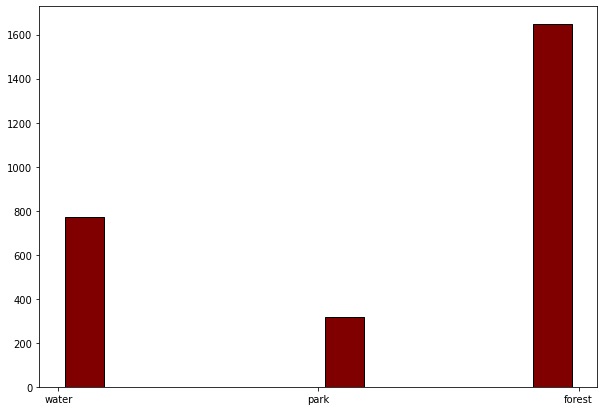

In [48]:
plt.figure(figsize =(10, 7))
plt.hist(natural['type'],color = "maroon", ec="black",rwidth=0.75)
plt.show()

In [49]:
natural['type'].unique()

array(['water', 'park', 'forest'], dtype=object)

In [50]:
data = ['water', 'forest']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  natural.drop(natural.loc[natural['type'] == location ].index, inplace=True)

In [51]:
#Dropping useless columns
natural =  natural.drop(['name'],axis=1)

In [52]:
natural.head()

,osm_id,type,geometry
10,23297293,park,"POLYGON ((-83.02329 42.25994, -83.02300 42.260..."
11,23306214,park,"POLYGON ((-82.94930 42.32060, -82.94827 42.318..."
12,23364273,park,"POLYGON ((-82.94569 42.30600, -82.94515 42.306..."
13,23388496,park,"POLYGON ((-83.02515 42.29622, -83.02513 42.296..."
14,23394507,park,"POLYGON ((-83.07646 42.29010, -83.07549 42.289..."


### Roads

In [53]:
roads.sample(5)

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
6548,116731231,Sandwich Street North,20,secondary,0,0,NaN,"LINESTRING (-83.11115 42.11661, -83.11128 42.1..."
5283,31704401,None,None,service,0,0,NaN,"LINESTRING (-82.60812 42.29701, -82.60841 42.2..."
19948,787951536,None,None,service,0,0,NaN,"LINESTRING (-83.05148 42.27781, -83.05088 42.2..."
12306,489065871,Dougall Avenue,None,primary,1,0,NaN,"LINESTRING (-83.00428 42.25792, -83.00428 42.2..."
23237,1036643712,None,None,footway,0,0,NaN,"LINESTRING (-83.11443 42.30220, -83.11543 42.3..."


In [54]:
roads.shape

(23329, 8)

In [55]:
roads['type'].value_counts()

service           8079
residential       6306
footway           3556
secondary         1440
tertiary          1180
unclassified       820
path               592
motorway           262
motorway_link      236
primary            175
trunk              156
cycleway           122
construction        89
trunk_link          83
secondary_link      67
track               55
tertiary_link       31
steps               27
pedestrian          18
raceway             12
proposed             8
corridor             7
primary_link         5
bridleway            2
living_street        1
Name: type, dtype: int64

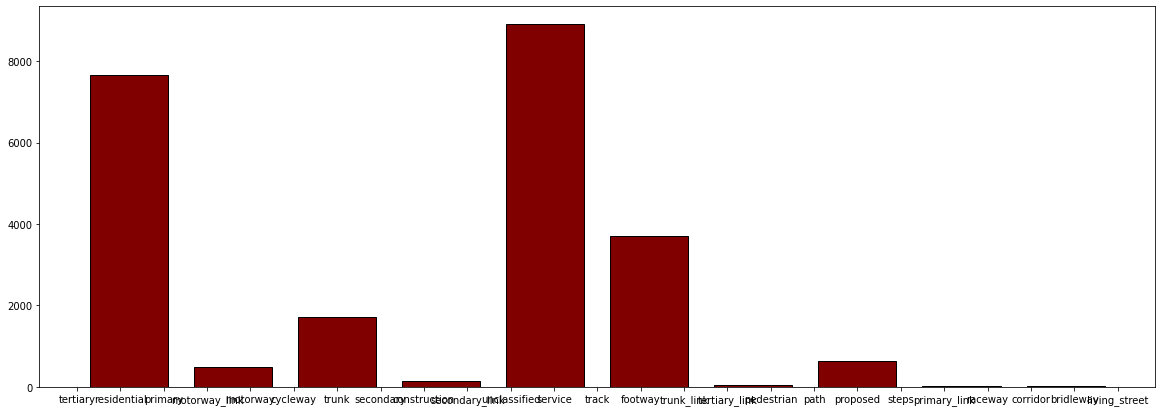

In [56]:
plt.figure(figsize =(20, 7))
plt.hist(roads['type'],color = "maroon", ec="black",rwidth=0.75)
plt.show()

In [57]:
roads['type'].unique()

array(['tertiary', 'residential', 'primary', 'motorway_link', 'motorway',
       'cycleway', 'trunk', 'secondary', 'construction', 'secondary_link',
       'unclassified', 'service', 'track', 'footway', 'trunk_link',
       'tertiary_link', 'pedestrian', 'path', 'proposed', 'steps',
       'primary_link', 'raceway', 'corridor', 'bridleway',
       'living_street'], dtype=object)

In [58]:
data = ['trunk','construction', 'secondary_link', 'unclassified', 'service',
         'track', 'footway', 'trunk_link', 'tertiary_link', 'pedestrian', 
         'path', 'proposed', 'steps', 'primary_link', 'raceway', 
         'corridor', 'bridleway']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  roads.drop(roads.loc[roads['type'] == location ].index, inplace=True)

In [59]:
#Dropping useless columns
roads =  roads.drop(['name','ref','oneway','bridge','maxspeed'],axis=1)

In [60]:
roads.head()

,osm_id,type,geometry
0,2627409,tertiary,"LINESTRING (-83.01725 42.25474, -83.01641 42.2..."
1,2627414,residential,"LINESTRING (-83.01614 42.25493, -83.01537 42.2..."
2,2628245,residential,"LINESTRING (-83.01424 42.24476, -83.01412 42.2..."
3,2628285,residential,"LINESTRING (-83.01615 42.24740, -83.01611 42.2..."
4,2628294,residential,"LINESTRING (-83.01267 42.24507, -83.01291 42.2..."


### Places

In [61]:
places.sample(5)

,osm_id,name,type,population,geometry
111,1887626949,Windsor (city),county,NaN,POINT (-82.97807 42.28585)
24,2142074499,Wheatley,locality,NaN,POINT (-82.46295 42.09506)
58,-2143728051,Byrnedale,locality,NaN,POINT (-82.67001 42.24544)
80,-2134708464,Turkey Island,island,NaN,POINT (-83.11346 42.18553)
89,-2133157508,Malden Centre,hamlet,NaN,POINT (-83.03655 42.06008)


In [62]:
places.shape

(124, 5)

In [63]:
places['type'].value_counts()

locality            58
neighbourhood       24
village              9
town                 9
island               9
hamlet               9
county               2
city                 1
village;locality     1
islet                1
suburb               1
Name: type, dtype: int64

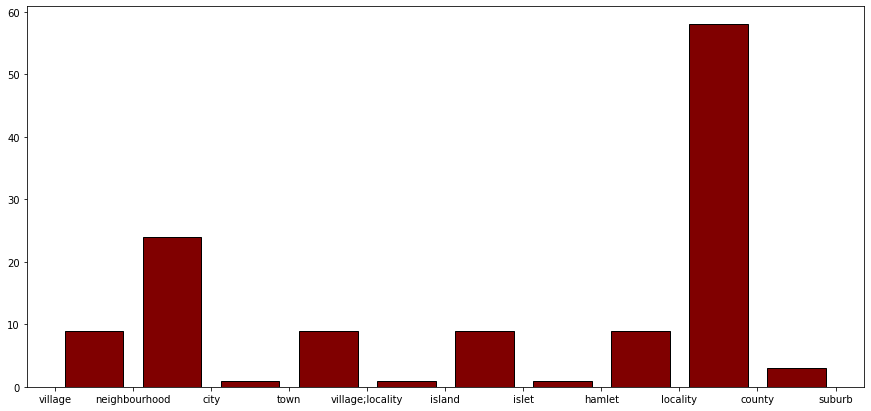

In [64]:
plt.figure(figsize =(15, 7))
plt.hist(places['type'],color = "maroon", ec="black",rwidth=0.75)
plt.show()

In [65]:
places['type'].unique()

array(['village', 'neighbourhood', 'city', 'town', 'village;locality',
       'island', 'islet', 'hamlet', 'locality', 'county', 'suburb'],
      dtype=object)

In [66]:
data = ['village', 'neighbourhood', 'village;locality',
       'island', 'islet', 'hamlet', 'locality']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  places.drop(places.loc[places['type'] == location ].index, inplace=True)

In [67]:
#Dropping useless columns
places =  places.drop(['name','population'],axis=1)

In [68]:
places.head()

,osm_id,type,geometry
3,253421090,city,POINT (-83.03534 42.31710)
4,254023814,town,POINT (-83.06065 42.24506)
5,254023816,town,POINT (-82.88620 42.31180)
7,260233622,town,POINT (-82.59970 42.05312)
8,260234802,town,POINT (-82.82155 42.17448)


### Combined Analysis

No handles with labels found to put in legend.


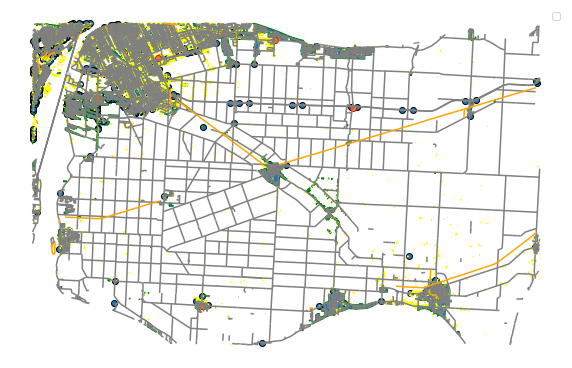

In [78]:
fig, ax = plt.subplots(figsize = (10, 10))
natural.plot(ax = ax,edgecolor = 'green')
roads.plot(ax = ax,edgecolor = 'grey')
water.plot(ax = ax,edgecolor = 'lightblue')
points.plot(ax = ax,edgecolor = 'black')
landuse.plot(ax = ax,edgecolor = 'green')
railways.plot(ax = ax,edgecolor = 'orange')
buildings.plot(ax = ax,edgecolor = 'yellow')
places.plot(ax = ax,edgecolor = 'red')
ax.set_axis_off()
plt.legend()
plt.show()


In [70]:
combined = roads.append(natural)
combined = combined.append(points)
combined = combined.append(landuse)
combined = combined.append(water)
combined = combined.append(places)
combined = combined.append(buildings)
combined = combined.append(railways)

In [71]:
combined.shape

(81088, 3)

In [72]:
combined

,osm_id,type,geometry
0,2627409,tertiary,"LINESTRING (-83.01725 42.25474, -83.01641 42.2..."
1,2627414,residential,"LINESTRING (-83.01614 42.25493, -83.01537 42.2..."
2,2628245,residential,"LINESTRING (-83.01424 42.24476, -83.01412 42.2..."
3,2628285,residential,"LINESTRING (-83.01615 42.24740, -83.01611 42.2..."
4,2628294,residential,"LINESTRING (-83.01267 42.24507, -83.01291 42.2..."
...,...,...,...
1212,1009997990,abandoned,"LINESTRING (-83.12751 42.28833, -83.12494 42.2..."
1213,1009997995,abandoned,"LINESTRING (-83.11784 42.28924, -83.11746 42.2..."
1214,1010001949,abandoned,"LINESTRING (-83.10869 42.28873, -83.10885 42.2..."
1215,1010001950,abandoned,"LINESTRING (-83.10924 42.28828, -83.10943 42.2..."


In [73]:
combined.drop_duplicates()

,osm_id,type,geometry
0,2627409,tertiary,"LINESTRING (-83.01725 42.25474, -83.01641 42.2..."
1,2627414,residential,"LINESTRING (-83.01614 42.25493, -83.01537 42.2..."
2,2628245,residential,"LINESTRING (-83.01424 42.24476, -83.01412 42.2..."
3,2628285,residential,"LINESTRING (-83.01615 42.24740, -83.01611 42.2..."
4,2628294,residential,"LINESTRING (-83.01267 42.24507, -83.01291 42.2..."
...,...,...,...
1212,1009997990,abandoned,"LINESTRING (-83.12751 42.28833, -83.12494 42.2..."
1213,1009997995,abandoned,"LINESTRING (-83.11784 42.28924, -83.11746 42.2..."
1214,1010001949,abandoned,"LINESTRING (-83.10869 42.28873, -83.10885 42.2..."
1215,1010001950,abandoned,"LINESTRING (-83.10924 42.28828, -83.10943 42.2..."


<Figure size 720x720 with 0 Axes>

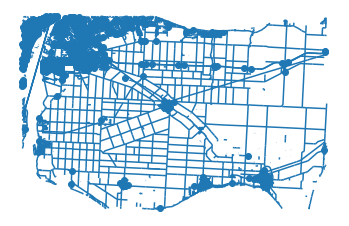

In [77]:
plt.figure(figsize=(10,10))
combined.plot()
plt.axis('off')
plt.show()